# 추세변동 ( trend variation )

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

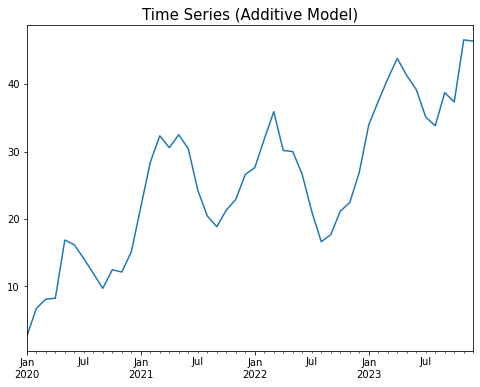

In [22]:



# DatetimeIndex
dates = pd.date_range('2020-01-01', periods=48, freq='M')

# Additive model : trend + cycle + seasonality + Irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0,3.14*2, 48))
season_factor = 7*np.sin(np.linspace(0,3.14*8,48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df = pd.DataFrame({'timeseries':trend_factor + cycle_factor + season_factor + irregular_factor, 'trend' : trend_factor, 'cycle' : cycle_factor, 'seasonal' : season_factor, 'irregular' : irregular_factor}, index=dates)

# Time series plot
plt.figure(figsize=(8,6), facecolor='w')
df.timeseries.plot()
plt.title('Time Series (Additive Model)', fontsize=15)
# plt.ylim(-12,55)
plt.show()

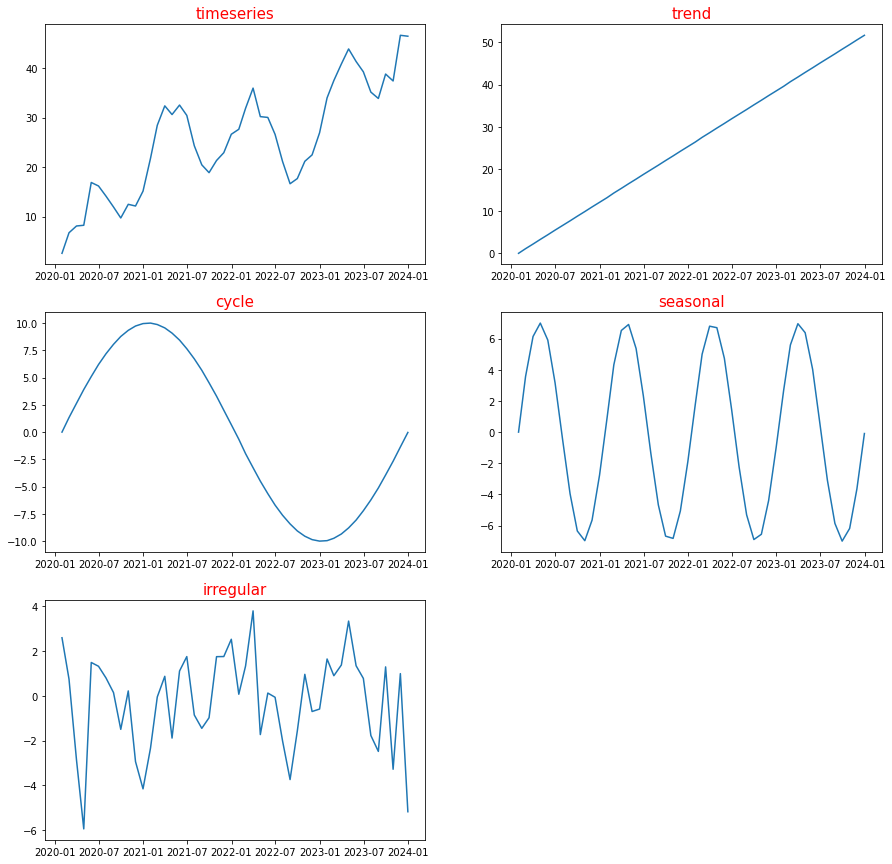

In [44]:
plt.figure(figsize=(15,15), facecolor='w')

features = ['timeseries', 'trend', 'cycle', 'seasonal', 'irregular']

for i, col in enumerate(features):
    # print(df[col].keys())
    # plt.figure(figsize=(15,15), facecolor='w')
    plt.subplot(3, 2, i+1)
    plt.title(col, fontsize = 15, color = 'r')
    plt.plot(df[col].keys(), df[col].values)
plt.show() # 이걸 for문 안에 쓰니깐 안되는거지 멍청하긴

# [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)
* DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 2020년 8월부터 일요일 8개 조회
pd.date_range(start='2020-08', periods=8, freq='W')

df = pd.DataFrame({'week' : pd.date_range(start="2020-08", periods=8, freq="W"), 'sales' : [39,44,40,45,38,43,39,np.nan], '3MA' : [0]*8})
# 0~2주차 평균을 3주차에 SHIFT 해서 적용
df["3MA"]=df[['sales']].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


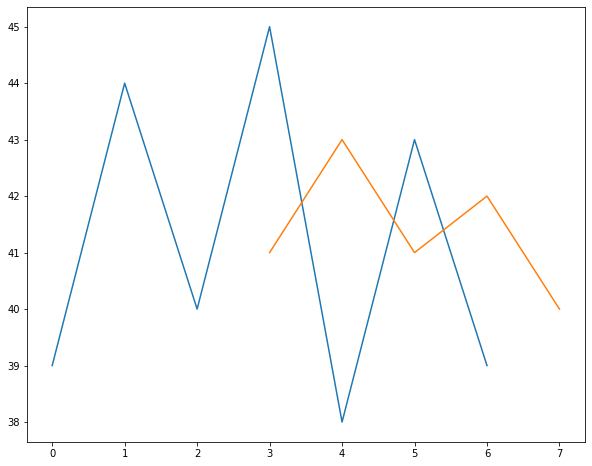

In [59]:
plt.figure(figsize=(10,8), facecolor='w')
plt.plot(df[['sales']])
plt.plot(df['3MA'])
plt.show()

In [58]:
import FinanceDataReader as fdr

# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader('AAPL', start='2010')

# 가장 최신의 10일치 주가 출력
df_apple.tail(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-04-01,174.31,174.03,174.88,171.94,78750000.0,-0.0017
2022-04-04,178.44,174.57,178.49,174.44,76210000.0,0.0237
2022-04-05,175.06,177.50,178.30,174.41,70900000.0,-0.0189
2022-04-06,171.83,172.36,173.63,170.13,88670000.0,-0.0185
2022-04-07,172.14,171.16,173.36,169.85,74950000.0,0.0018
2022-04-08,170.09,171.78,171.78,169.20,76580000.0,-0.0119
2022-04-11,165.75,168.71,169.03,165.50,71550000.0,-0.0255
2022-04-12,167.66,168.02,169.87,166.64,78990000.0,0.0115
2022-04-13,170.40,167.39,171.04,166.77,70190000.0,0.0163


Text(0.5, 1.0, 'Close Price for Apple')

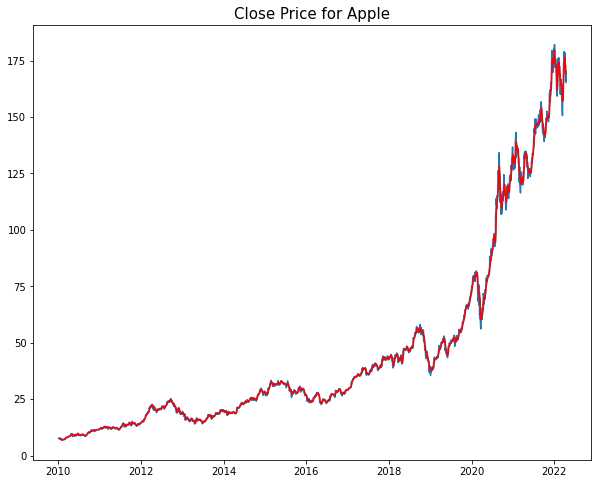

In [71]:
plt.figure(figsize=(10,8), facecolor='w')
plt.plot(df_apple[['Close']])
df_apple['Close_7Days_Mean']=df_apple['Close'].rolling(7).mean()
plt.plot(df_apple['Close_7Days_Mean'], color = 'r')
plt.title('Close Price for Apple', fontsize=15)

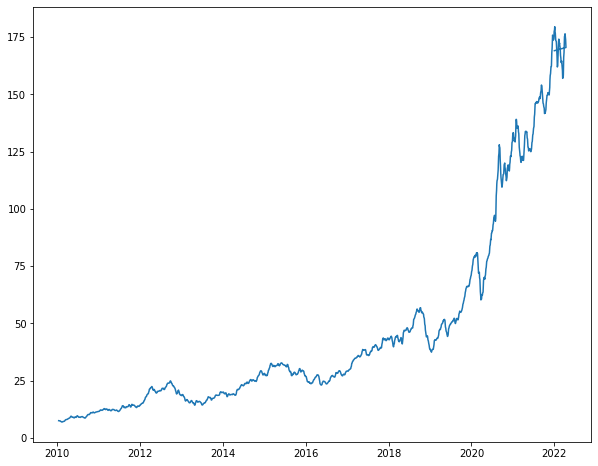

In [73]:
# 2010~2022 년까지 애플의 종가 그래프이다. 7일전 평균값을 shift 하여 이동평균 그래프를 추가 7일 평균값으로 부드러워진 곡선 그래프를 볼 수 있다.

last_day = datetime(2022,1,2)
df_apple.loc[last_day,"Close"] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
plt.figure(figsize=(10,8), facecolor='w')
plt.plot(df_apple[['Close_7Days_Mean']])

# [pandas.DataFrame.resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)
* DataFrame.resample(rule, axis=0, closed=None, label=None, convention='start', kind=None, loffset=None, base=None, on=None, level=None, origin='start_day', offset=None)

Text(0.5, 1.0, 'Monthly Mean Close Price For Apple')

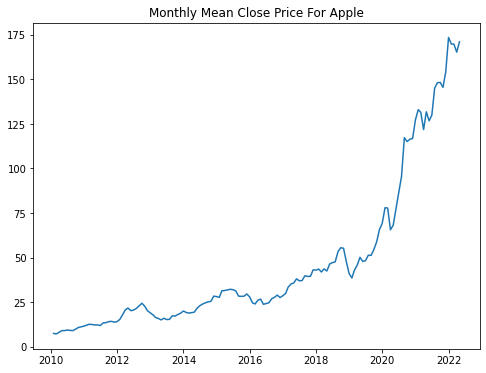

In [100]:
# resample은 데이터프레임의 시계열 인덱스 기준으로 샘플링을 편하게 해주는 메소드이다.

# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule='M').mean()

# 마지막 컬럼(Close_7Days_Mean)제외
df_apple_monthly = df_apple_monthly.iloc[:,:-1]

# 얼별 주가(종가)를 시각화
plt.figure(figsize=(8,6), facecolor='w')
plt.plot(df_apple_monthly[['Close']])
plt.title('Monthly Mean Close Price For Apple')

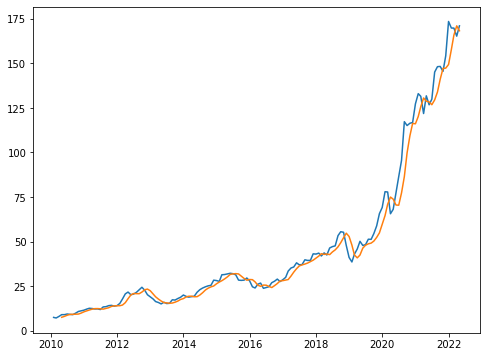

In [101]:
# 월단위 평균값을 또 3개월치씩 이동평균을 적용하는 코드

df_apple_monthly[['Close_3Month_Mean']] = df_apple_monthly[['Close']].rolling(3).mean().shift(1)
plt.figure(figsize=(8,6), facecolor='w')
plt.plot(df_apple_monthly[['Close','Close_3Month_Mean']])

# [pandas.DataFrame.expanding](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html?highlight=expanding#pandas.DataFrame.expanding)
* DataFrame.expanding(min_periods=1, center=None, axis=0, method='single')

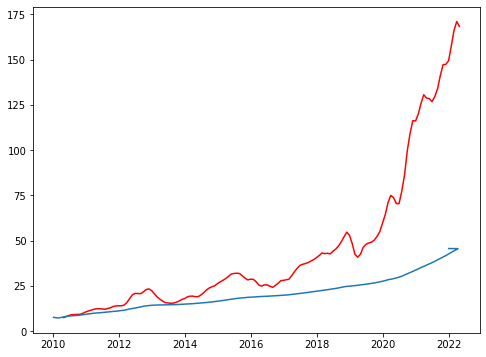

In [118]:
df_apple_monthly_exp = df_apple.expanding(3).mean()
df_apple_monthly_exp.drop('Close_7Days_Mean',axis=1, inplace=True)
df_apple_monthly_exp[['Close_3Month_Mean']] = df_apple_monthly_exp[['Close']].rolling(3).mean().shift(1)

plt.figure(figsize=(8,6), facecolor='w')
plt.plot(df_apple_monthly[['Close_3Month_Mean']], color = 'red')
plt.plot(df_apple_monthly_exp[['Close_3Month_Mean']])

# [pandas.DataFrame.ewm](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html)
* DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None, method='single')

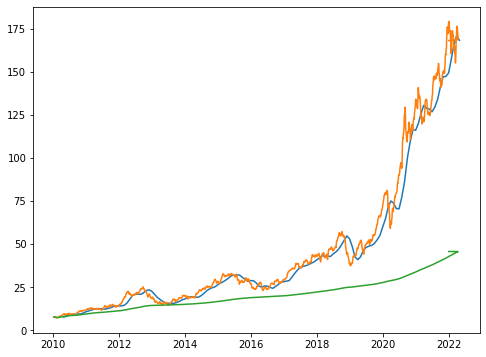

In [126]:
df_apple_monthly_ewm = df_apple.ewm(span=3).mean()
df_apple_monthly_ewm.drop('Close_7Days_Mean',axis=1, inplace=True)
df_apple_monthly_ewm[['Close_3Month_Mean']] = df_apple_monthly_ewm[['Close']].rolling(3).mean().shift(1)

plt.figure(figsize=(8,6), facecolor='w')
plt.plot(df_apple_monthly[['Close_3Month_Mean']])
plt.plot(df_apple_monthly_ewm[['Close_3Month_Mean']])
plt.plot(df_apple_monthly_exp[['Close_3Month_Mean']])

In [222]:
df = pd.DataFrame({'week' : pd.date_range(start="2020-08", periods=8, freq='W'), 'sales':[39,44,40,45,38,43,39,np.nan],'3EMA':[0]*8})

def myEWMA(data, span):
    # 지수 이동 평균을 계산해서 저장할 리스트
    ewma=[0]*len(data)
    # 지수 이동 평균의 분자
    molecule=0
    # 지수 이동 평균의 분모
    denominator=0
    # 값에 곱해지는 가중치
    alpha = 2/(1 + span)
    for i in range(len(data)):
        # 분자 계산 data+(1-alpha)앞의 데이터
        molecule = (data[i] + (1-alpha)*molecule)
        # 분모 계산 (1-alpha)의 i승
        denominator+=(1-alpha)**i
        print('index',i)
        print('molecule:',molecule)
        print('denominator"', denominator)
        # 지수 이동 평균 계산
        ewma[i] = molecule/denominator
        print('ewma',ewma[i])
        print('='*100)
    return ewma

In [223]:
df['sales'].ewm(span=3).mean()

0    39.000000
1    42.333333
2    41.000000
3    43.133333
4    40.483871
5    41.761905
6    40.370079
7    40.370079
Name: sales, dtype: float64

In [224]:
ewma = myEWMA(df['sales'], 3)
df['EWMA']=ewma

index 0
molecule: 39.0
denominator" 1.0
ewma 39.0
index 1
molecule: 63.5
denominator" 1.5
ewma 42.333333333333336
index 2
molecule: 71.75
denominator" 1.75
ewma 41.0
index 3
molecule: 80.875
denominator" 1.875
ewma 43.13333333333333
index 4
molecule: 78.4375
denominator" 1.9375
ewma 40.483870967741936
index 5
molecule: 82.21875
denominator" 1.96875
ewma 41.76190476190476
index 6
molecule: 80.109375
denominator" 1.984375
ewma 40.37007874015748
index 7
molecule: nan
denominator" 1.9921875
ewma nan


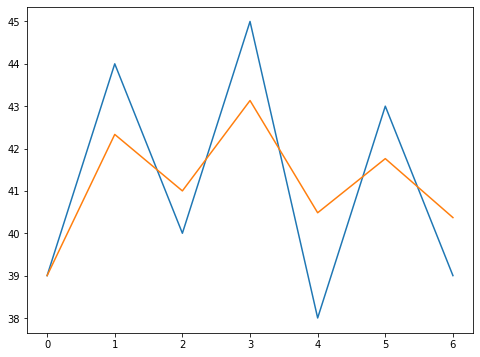

In [226]:
plt.figure(figsize=(8,6), facecolor='w')
plt.plot(df['sales'])
plt.plot(df['EWMA'])
plt.show()

# 정상성(stationarity)과 차분(differencing)

<details>
<summary>자기상관함수(ACF : Auto Correlation Function)</summary>

* 자기 상관은 다른 시점의 관측값 간 상호 연관성을 나타내므로 이는 시차를 적용한 시계열 데이터 간의 상관관계를 의미
* 자기상관 AC_k는 원래의 시계열 데이터 (y_t)와 k 시차가 고려된, 즉 k기간뒤로 이동한 시계열 데이터(y_(t-k)) 간의 상관관계로 정의
    - 예를 들어, AC_1은 시차0 시계열 데이터와 시차1 시계열 데이터 간의 상관관계
    - AC_0는 동일한 시계열 데이터 간의 상관관계이므로 항상 1
* 시차에 따른 일련의 자기상관 {AC_1,AC_2,...,AC_k}를 자기상관함수(Auto Correlation Function, ACF)라고 함
* ACF는 시차에 따른 관측값 간의 연관 정도를 보여주며, 시차가 커질수록 ACF는 점차 0에 가까워지게 됨
* ACF는 시계열의 정상성을 평가할 때 유용
    - 정상 시계열의 ACF는 상대적으로 빨리 0으로 접근함
    - 비정상 시계열의 ACF는 천천히 감소하며 종종 큰 양의 값을 가짐

</details>

<details>
<summary>편자기상관함수(PACF :Partial Auto Correlation Function)</summary>

* 편자기상관은 시차가 다른 두 시계열 데이터 같의 순수한 상호 연관성을 나타냄
* 편자기상관 PAC_k는 원래의 시계열 데이터(y_t)와 시차 k 시계열 데이터(y_(t-k))간의 순수한 상관관계로서 두 시점 사이에 포함된 모든 시계열 데이터(y_(t-1), y_(t-2),...,y_(t-k+1))의 영향은 제거됨
* 시차에 따른 일련의 편자기상관 {PAC_1, PAC_2, ... ,PAC_k}를 편자기상관함수(Partial Auto Correlation Function, PACF)라고 함

</details>

<details>
<summary>정상 시계열로의 변환</summary>

* 변동폭이 일정하지 않으면 로그 변환을 통해 시간의 흐름에따라 분산이 일정하게 유지되는 정상 시계열로 변환
* 추세나 계절적 요인이 관찰되면 차분(differencing, 시계열 y_t의 각 관측값을 y_t - y_(t-1) 로 대체) 과정을 통해 전 기간에 걸쳐 평균이 일정한 정상 시계열로 변환
* 변동폭이 일정하지 않고 추세와 계절적 요인 또한 존재하면 로그 변환과 차분 과정을 모두 적용하여 정상 시계열로 변환

</details>

<details>
<summary>정상성(stationarity)</summary>

* 정태성이라고도 하며, 일정하여 늘 한결같은 성질을 뜩한다.
* 시계열에서 정상성이 있다는 것은 추세나 동향이 없는 상태로, 시계열의 평균이 시간축에 평행하다는 의미이다.
* 시계형 자료가 시계열 모형으로 적합시키기 위한 전제 조건에 해단한다. 즉, 추세와 동향이 있는 상태로는 모형을 만들수 없다.(다루기 어렵다)
* 비정상성 시계열은 정상 시계열로 변환해야 하며, 차분(differencing)을 이용한다.

</details>

<details>
<summary>차분(differencing)</summary>

* 차분은 현시점 자료에서 전 시점 자료를 빼는 것을 말한다.
* 일반차분(regular difference)은 바로 전 시점의 자료를 빼는 것이고, 계절차분(seasonal difference)은 여러 시점 전의 자료를 빼는 것이다.

</details>

In [281]:
file_path= 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv' 
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [282]:
### Variance Stabilizing Transformation(VST) by Taking Logarithm
df_vst = np.log(df.values)
df_vst = pd.DataFrame(data=df_vst, index=df.index)

# 추세가 있는 경우 차분을 통한 추세 제거 (de-trend by differencing)
# de-trend by differencing
df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1

# stationary process: de-seasonality by seasonal differencing
df_vst_diff2 = df_vst_diff1.diff(12).dropna()

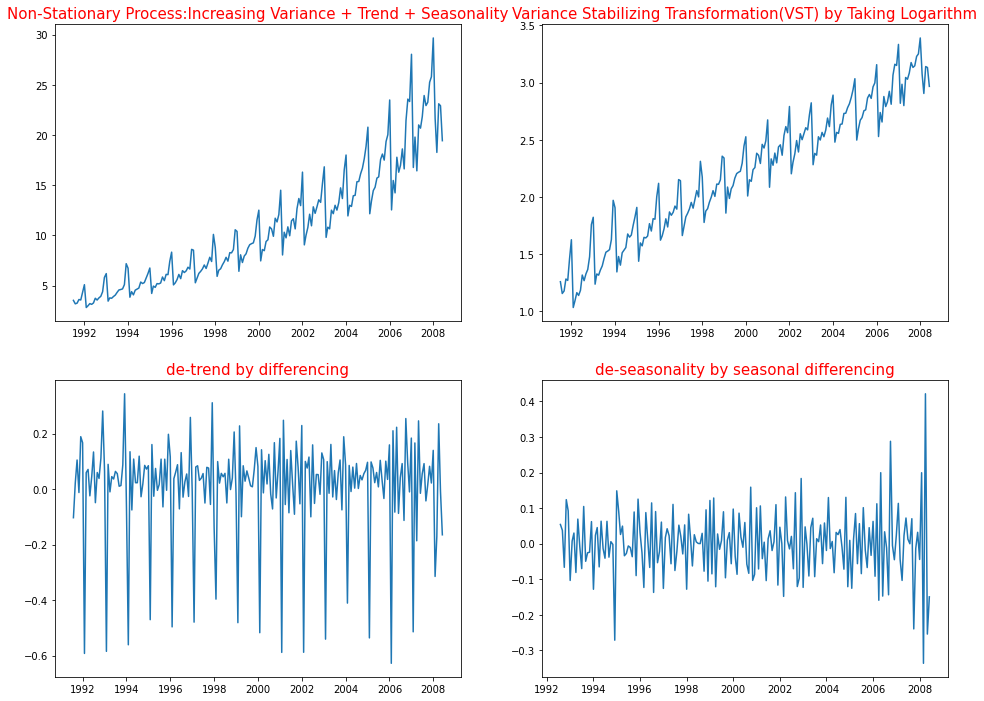

In [283]:
# 그래프로 각각 표현
plt.figure(figsize=(16,12), facecolor='w')

features = [df, df_vst, df_vst_diff1, df_vst_diff2]
features_n = ['Non-Stationary Process:Increasing Variance + Trend + Seasonality', 'Variance Stabilizing Transformation(VST) by Taking Logarithm', 'de-trend by differencing', 'de-seasonality by seasonal differencing']

for i, col in enumerate(features):
    
    plt.subplot(2, 2, i+1)
    plt.title(features_n[i], fontsize = 15, color = 'r')
    plt.plot(col)
plt.show()

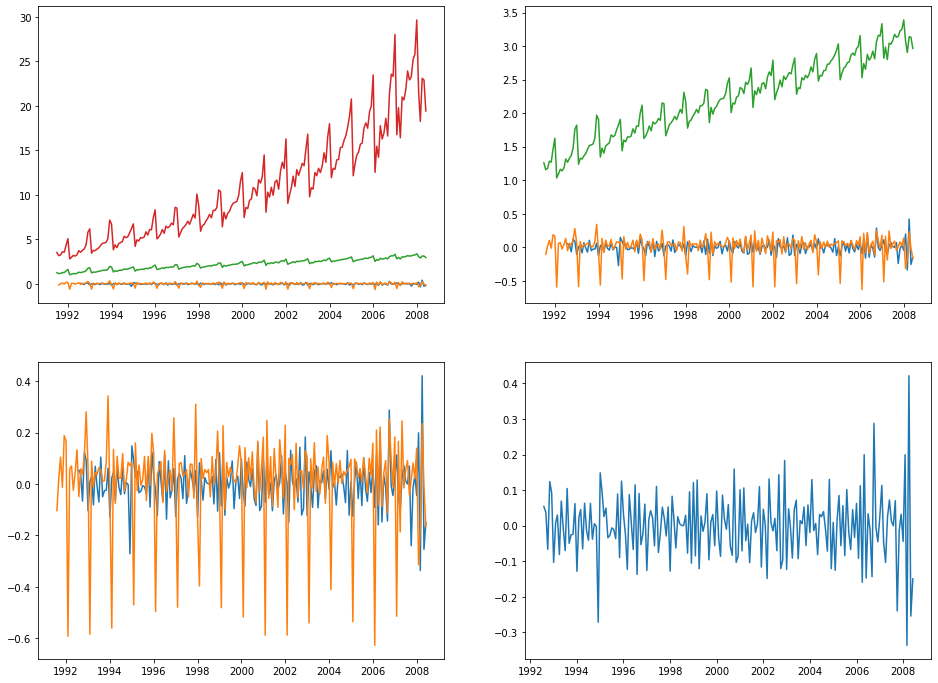

In [284]:
# 그래프 하나에 다표현
features.reverse()
plt.figure(figsize=(16,12), facecolor='w')
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    for j in range(len(features)-i):
        plt.plot(features[j])
        
plt.show()


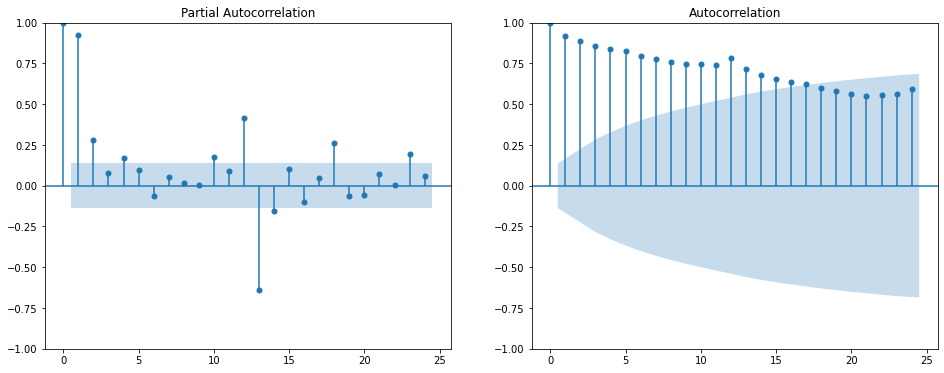

In [211]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs=plt.subplots(figsize=(16,6),ncols=2,nrows=1, facecolor='w')

fig = plot_pacf(df,ax=axs[0])
fig = plot_acf(df,ax=axs[1])

### AR(p) - 자기 회귀 모형
- 예측하고 싶은 특정 변수의 과거 자신의 데이터와 선형 결합을 통해 특정 시점 이후 미래값을 예측하는 모델
- 이전 자신의 데이터가 이후 자신의 미래 관측값에 영향을 미친다는 것을 기반으로 나온 모델
- ArmaProcess(ar = [1, theta_1, theta_2, ..., theta_q], ma = [1]) 생성

### MA(q) - 이동 평균 모형

- ArmaProcess(ar = [1], ma = [1, theta_1, theta_2, ..., theta_q]) 생성

### ARMA(p,q)

- statsmodels.tsa.arima_process.ArmaProcess
- class statsmodels.tsa.arima_process.ArmaProcess(ar=None, ma=None, nobs=100)

### ARIMA(p,d,q) - 자기회귀누적 이동평균 모형
#### statsmodels.tsa.arima_process.ArmaProcess
- class statsmodels.tsa.arima_process.ArmaProcess(ar=None, ma=None, nobs=100)
#
- AR(p) = ARIMA(p, 0, 0)
- MA(q) = ARIMA(0, 0, q)
- ARMA(p, q) = ARIMA(p, 0, q)

### SARIMA - 계절 자기회귀 이동평균 모형

In [258]:
# AR

import statsmodels.api as sm # 이 친구는 누구인가?
from statsmodels.tsa.arima_process import ArmaProcess
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html 

# ArmaProcess(sm)로 모형 생성하고 nobs만큼 샘플 생성
def gen_arma_samples(ar, ma, nobs):
    arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples

# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
def gen_random_walk_w_drift(nobs, drift):
    init = np.random.normal(size=1, loc=0)
    e = np.random.normal(size=nobs, scale=1)
    y = np.zeros(nobs)
    y[0] = init
    for t in (1, nobs):
        y[t] = drift + 1 * y[t-1] + e[t]
        return y

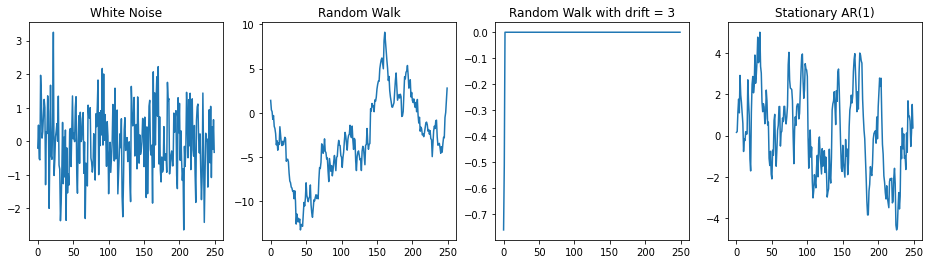

In [259]:
np.random.seed(12345)

white_noise= gen_arma_samples(ar = [1], ma = [1], nobs = 250)
# y_t = epsilon_t
random_walk = gen_arma_samples(ar = [1,-1], ma = [1], nobs = 250) # (1 - L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250, 2)
# y_t = 2 + y_{t-1} + epsilon_t
stationary_ar_1 = gen_arma_samples(ar = [1,-0.9], ma = [1],nobs=250) # (1 - 0.9L) y_t = epsilon_t

fig,ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("White Noise")

ax[1].plot(random_walk)
ax[1].set_title("Random Walk")

ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with drift = 3")

ax[3].plot(stationary_ar_1) 
ax[3].set_title("Stationary AR(1)")
fig.set_size_inches(16,4)

In [260]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df_apple = fdr.DataReader('AAPL', start = '2020')

df_apple_diff1 = df_apple[['Close']].diff(1).dropna()
df_apple_diff1

,Close
Date,
2020-01-03,-0.73
2020-01-06,0.59
2020-01-07,-0.35
2020-01-08,1.20
2020-01-09,1.61
...,...
2022-04-08,-2.05
2022-04-11,-4.34
2022-04-12,1.91


In [261]:
# AR

model_AR = ARIMA(df_apple_diff1, order=(1,0,0))
model_fit_AR = model_AR.fit()
print(model_fit_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  576
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1348.611
Date:                Mon, 18 Apr 2022   AIC                           2703.223
Time:                        18:21:18   BIC                           2716.291
Sample:                             0   HQIC                          2708.319
                                - 576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.100      1.576      0.115      -0.038       0.352
ar.L1         -0.0527      0.035     -1.507      0.132      -0.121       0.016
sigma2         6.3267      0.279     22.702      0.0

In [262]:
# MA

model_MA = ARIMA(df_apple_diff1, order=(0,0,1))
model_fit_MA = model_MA.fit()
print(model_fit_MA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  576
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1348.608
Date:                Mon, 18 Apr 2022   AIC                           2703.216
Time:                        18:21:28   BIC                           2716.285
Sample:                             0   HQIC                          2708.313
                                - 576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.099      1.582      0.114      -0.038       0.352
ma.L1         -0.0530      0.036     -1.488      0.137      -0.123       0.017
sigma2         6.3267      0.279     22.703      0.0

In [263]:
# ARMA

model_ARMA = ARIMA(df_apple_diff1, order=(1,0,1))
model_fit_ARMA = model_ARMA.fit()
print(model_fit_ARMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  576
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1348.571
Date:                Mon, 18 Apr 2022   AIC                           2705.142
Time:                        18:21:37   BIC                           2722.566
Sample:                             0   HQIC                          2711.937
                                - 576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1573      0.098      1.606      0.108      -0.035       0.349
ar.L1          0.4245      0.503      0.844      0.398      -0.561       1.410
ma.L1         -0.4734      0.491     -0.964      0.3

In [264]:
# ARIMA

model_ARIMA = ARIMA(df_apple_diff1, order=(1,1,1))
model_fit_ARIMA = model_ARIMA.fit()
print(model_fit_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  576
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1350.003
Date:                Mon, 18 Apr 2022   AIC                           2706.006
Time:                        18:21:52   BIC                           2719.069
Sample:                             0   HQIC                          2711.101
                                - 576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0511      0.036     -1.437      0.151      -0.121       0.019
ma.L1         -0.9995      0.095    -10.576      0.000      -1.185      -0.814
sigma2         6.3408      0.677      9.362      0.0

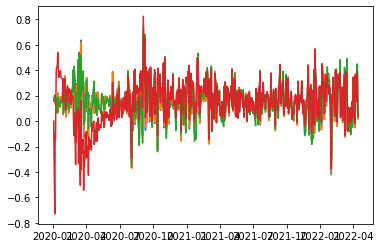

In [265]:
plt.plot(model_fit_AR.predict())
plt.plot(model_fit_MA.predict())
plt.plot(model_fit_ARMA.predict())
plt.plot(model_fit_ARIMA.predict())